In [234]:
%matplotlib inline

#Dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import gmaps
import gmaps.datasets
import folium

In [235]:
indeed_data = pd.read_csv('./resources/01_indeed_job_dataset.csv')
indeed_data.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [236]:
print(indeed_data['Location'])
#indeed_data.columns


0        MO
1        TX
2        OR
3        DC
4        TX
5        MD
6        NY
7        GA
8        ID
9        MO
10       PA
11       PA
12       TX
13       GA
14       GA
15       FL
16       MA
17       VA
18       NJ
19       MA
20       LA
21       MO
22       MO
23       NY
24       GA
25       VA
26       LA
27       NY
28       MA
29       CA
       ... 
5685     CA
5686     MA
5687     NY
5688     NY
5689     CA
5690     CA
5691     CA
5692     CA
5693     CA
5694     NY
5695     CA
5696     MA
5697     CA
5698     CA
5699     WA
5700    NaN
5701     VA
5702     CA
5703     NY
5704     NJ
5705     CA
5706     CA
5707     CA
5708     CA
5709    NaN
5710    NaN
5711     CA
5712     DE
5713     NY
5714     MD
Name: Location, Length: 5715, dtype: object


In [237]:
indeed_location= indeed_data[['Job_Type','Location']]
indeed_location.head()

,Job_Type,Location
0,data_scientist,MO
1,data_scientist,TX
2,data_scientist,OR
3,data_scientist,DC
4,data_scientist,TX


In [238]:
#replace the blank values with Unknows
indeed_location.replace(np.NaN, 'Any', inplace=True)
indeed_location.head()

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Job_Type,Location
0,data_scientist,MO
1,data_scientist,TX
2,data_scientist,OR
3,data_scientist,DC
4,data_scientist,TX


In [243]:
#remove all "Any" entries from the set
indeed_location.drop(indeed_location.index[indeed_location['Location'] == 'Any'], inplace = True)
indeed_location.head()

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Job_Type,Location
0,data_scientist,MO
1,data_scientist,TX
2,data_scientist,OR
3,data_scientist,DC
4,data_scientist,TX


In [244]:
#Group the dataset by Job Type and State
perc_values = indeed_location.groupby('Location', as_index=False)['Job_Type'].count()
total_jobs = len(indeed_location)
#print(total_jobs)
perc_values['Job_Type'] = perc_values['Job_Type'].astype(int)
perc_values['perc']= perc_values['Job_Type']/total_jobs
#perc_values['perc'] = perc_values['perc'].map(lambda n: '{:.2%}'.format(n))
#perc_values=perc_values.sort_values('perc').reset_index(drop=True)
perc_values.head()

,Location,Job_Type,perc
0,AL,17,0.003112
1,AR,28,0.005125
2,AZ,53,0.009702
3,CA,1395,0.255354
4,CO,109,0.019952


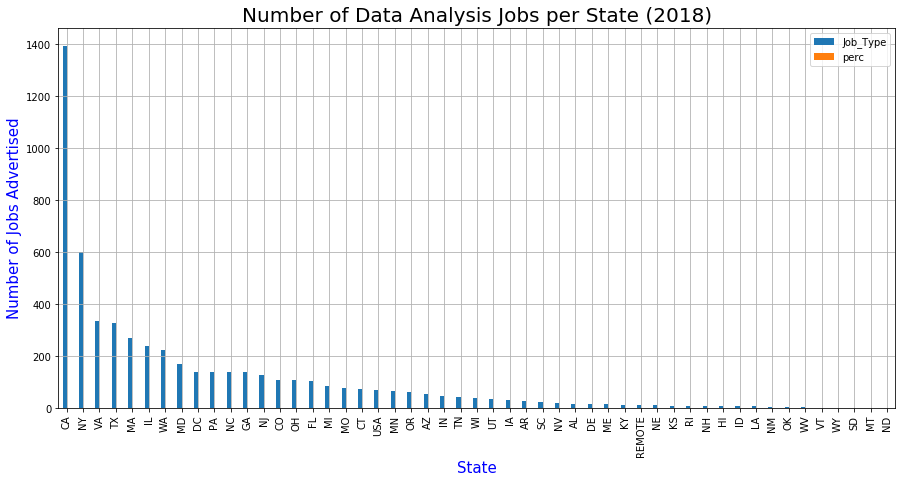

In [245]:
#create bar graph to illustrate number of Data Analysis jobs per state
fig, ax = plt.subplots(figsize=(15,7))
#grouped_df = indeed_location.groupby('Location', as_index=False)['Job_Type'].count()
grouped_df=perc_values.sort_values('Job_Type', ascending = False).reset_index(drop=True)
grouped_df.plot(ax=ax, kind='bar')
ax.set_title('Number of Data Analysis Jobs per State (2018)', size=20)
ax.set_xlabel(xlabel='State', color='b', size=15)
ax.set_ylabel(ylabel='Number of Jobs Advertised', color='b', size=15)
ax.set_xticklabels(grouped_df.Location)
plt.grid()
plt.show()


In [264]:
#Create Choropleth map
#Load the shape of the US States
state_geo = os.path.join('./resources/us-states.json')
#initialize the map
state_map = folium.Map(location=[37, -102], zoom_start=5)
#Add the color for the chloropleth
state_map.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=perc_values,
    columns=['Location','perc'],
    key_on='feature.id',
    fill_color='BuGn',
    fill_opacity=1.0,
    line_opacity=0.2,
    legend_name="Data Analysis Jobs by State"
)
folium.LayerControl().add_to(state_map)
state_map.save("./Images/_map.html")
state_map



In [126]:
indeed_state = indeed_data[['Job_Type','CA','NY','VA','TX','MA','IL','WA','MD','DC','NC','Other_states']]
indeed_state.head()

,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states
0,data_scientist,0,0,0,0,0,0,0,0,0,0,1
1,data_scientist,0,0,0,1,0,0,0,0,0,0,0
2,data_scientist,0,0,0,0,0,0,0,0,0,0,1
3,data_scientist,0,0,0,0,0,0,0,0,1,0,0
4,data_scientist,0,0,0,1,0,0,0,0,0,0,0


In [117]:
#replace the blank values with Unknows
indeed_state.replace(np.NaN, 'Unknown', inplace=True)
indeed_state.head()

,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states
0,data_scientist,0,0,0,0,0,0,0,0,0,0,1
1,data_scientist,0,0,0,1,0,0,0,0,0,0,0
2,data_scientist,0,0,0,0,0,0,0,0,0,0,1
3,data_scientist,0,0,0,0,0,0,0,0,1,0,0
4,data_scientist,0,0,0,1,0,0,0,0,0,0,0


In [148]:
#Group the dataset by Job Type and State
indeed_state.groupby('Job_Type', as_index=False)['CA','NY','VA','TX','MA','IL','WA','MD','DC','NC','Other_states'].sum()


,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states
0,data_analyst,376,230,85,117,86,66,57,55,48,46,625
1,data_engineer,296,118,72,76,52,68,43,20,24,38,324
2,data_scientist,723,253,177,136,133,106,122,94,68,55,674


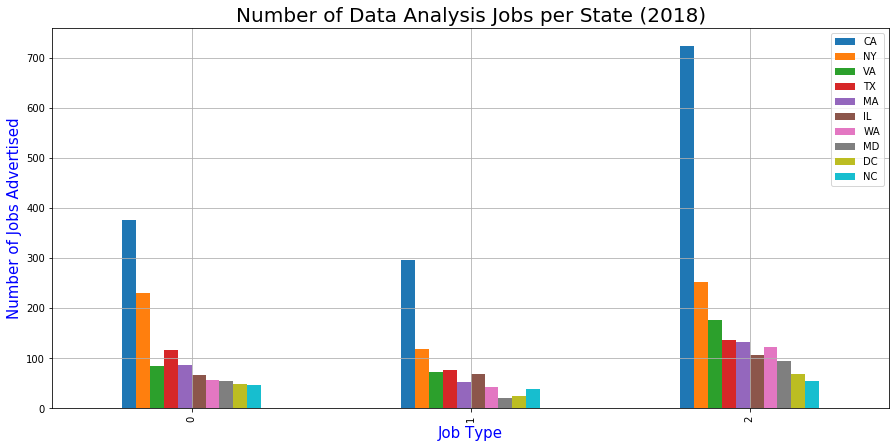

In [150]:
fig, ax = plt.subplots(figsize=(15,7))
indeed_state.groupby('Job_Type', as_index=False)['CA','NY','VA','TX','MA','IL','WA','MD','DC','NC'].sum().plot(ax=ax, kind='bar')
ax.set_title('Number of Data Analysis Jobs per State (2018)', size=20)
ax.set_xlabel(xlabel='Job Type', color='b', size=15)
ax.set_ylabel(ylabel='Number of Jobs Advertised', color='b', size=15)
plt.grid()
plt.show()

In [165]:
state_df=indeed_state.groupby('Job_Type', as_index=False)['CA','NY','VA','TX','MA','IL','WA','MD','DC','NC'].sum()
state_df

,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC
0,data_analyst,376,230,85,117,86,66,57,55,48,46
1,data_engineer,296,118,72,76,52,68,43,20,24,38
2,data_scientist,723,253,177,136,133,106,122,94,68,55


In [170]:
#reformat dataframe to add state columns to rows
new_format_df = state_df.melt(id_vars=["Job_Type"], 
        var_name="State", 
        value_name="Value")
new_format_df

,Job_Type,State,Value
0,data_analyst,CA,376
1,data_engineer,CA,296
2,data_scientist,CA,723
3,data_analyst,NY,230
4,data_engineer,NY,118
5,data_scientist,NY,253
6,data_analyst,VA,85
7,data_engineer,VA,72
8,data_scientist,VA,177
9,data_analyst,TX,117


In [172]:
# Group data for all Data Anlysis jobs by state to use in the Choropleth map 
state_group_df=new_format_df.groupby('State', as_index=False)['Value'].sum()
state_group_df   

,State,Value
0,CA,1395
1,DC,140
2,IL,240
3,MA,271
4,MD,169
5,NC,139
6,NY,601
7,TX,329
8,VA,334
9,WA,222


In [176]:

#Create Choropleth map
#Load the shape of the US States
state_geo = os.path.join('./resources/us-states.json')
#initialize the map
mymap = folium.Map(location=[37, -102], zoom_start=5)
#Add the color for the chloropleth
mymap.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_group_df,
    columns=['State','Value'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Data Analysis Jobs by State"
)
folium.LayerControl().add_to(mymap)
mymap